<a href="https://colab.research.google.com/github/red1ithink/flow/blob/main/uvw_rgb_plot_and_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install givernylocal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: rpds-py
    Found existing installation: rpds-py 0.20.0
    Uninstalling rpds-py-0.20.0:
      Successfully uninstalled rpds-py-0.20.0
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: jsonschema-specifications
    Found ex

# **11/8 과제**

In [ ]:
"""
2D plane demo points : evenly spaced over a 2D plane lying along one of the primary axes
    - time : the time to be queried (snapshot number for datasets without a full time evolution).
    - nx, nz : number of points along each axis. total number of points queried will be n_points = nx * nz.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 2D plane.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
import cv2
import os
time = 0

nx = 64
nz = 32
n_points = nx * nz
frames = "frames"
os.makedirs(frames, exist_ok=True)

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype = np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.15 * np.pi, nz, dtype = np.float64)

points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)

"""
display sample results on screen.
"""
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(points)}')
print(f'\npoints = \n-\n{points}')
# the 1st time index of result corresponds to the final time for the "position" variable and the initial time for all other variables.
print(f'\nresult (1st time index) = \n-\n{result[0]}\n')

"""
with result, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 2D plane.
""";
if nx >= 2 and nz >= 2:
    # user-defined plot parameters.
    # which time of the data to plot (0-based index, so the first time component is specified as 0).
    time_component = 0
    # which component (column) of the data to plot (0-based index, so the first component is specified as 0).
    plot_component = 0

    # reformat 'result' for plotting.
    result_time = result[time_component]
    result_array = np.array(result_time)
    data_plot = np.zeros((nx, nz, len(result_time.columns)), dtype = np.float32)
    x_plot = np.zeros((nx, nz), dtype = np.float64)
    z_plot = np.zeros((nx, nz), dtype = np.float64)

    for i in range(nx):
        for j in range(nz):
            x_plot[i, j] = x_points[i]
            z_plot[i, j] = z_points[j]
            data_plot[i, j, :] = result_array[i * nz + j, :]

    # plot the data.
    fig = plt.figure(figsize = (7, 7), dpi = 67)
    contour = plt.contourf(x_plot, z_plot, data_plot[:, :, plot_component], levels = 500, cmap = 'inferno')
    plt.gca().set_aspect('equal')
    # select the colorbar orientation depending on which axis is larger.
    colorbar_orientation = 'vertical' if (np.max(z_plot) - np.min(z_plot)) >= (np.max(x_plot) - np.min(x_plot)) else 'horizontal'
    cbar = plt.colorbar(contour, shrink = 0.67, orientation = colorbar_orientation)
    # rotate the horizontal colorbar labels.
    if colorbar_orientation == 'horizontal':
        for label in cbar.ax.get_xticklabels():
            label.set_rotation(90)
    cbar.set_label(f'{variable} {spatial_operator}', labelpad = 12, fontsize = 14)
    plt.title(f'{dataset_title}', fontsize = 16)
    plt.xlabel('x', labelpad = 7, fontsize = 14)
    plt.ylabel('z', labelpad = 7, fontsize = 14)
    cbar.ax.tick_params(labelsize = 12)
    plt.tick_params(axis = 'both', labelsize = 12)
    plt.tight_layout()
    plt.show()
    plt.close()
    result

In [ ]:
from givernylocal.turbulence_dataset import *
from givernylocal.turbulence_toolkit import *
import numpy as np

auth_token = 'edu.jhu.pha.turbulence.testing-201406'
dataset_title = 'isotropic1024fine'
output_path = './giverny_output'

# instantiate the dataset.
dataset = turb_dataset(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)
print(dataset)
print(type(dataset))

<class 'givernylocal.turbulence_dataset.turb_dataset'>


In [ ]:
"""
initialize getData parameters (except time and points)
"""
#u,v,w,t,p,F로 물리량 계산 (편미분하여 shear stress 계산 u())
#u, v, w/ u,v,w를 정규화하 rgb로 그림그리기/ u,v vorticity 100개 그리기고 에니메이션
variable = 'velocity'
temporal_method = 'none'
spatial_method = 'lag8'
spatial_operator = 'field'


-----
getData is processing...

total time elapsed = 0.751 seconds (0.013 minutes)

query completed successfully.
-----
num points = 2048

points = 
-
[[0.         0.9        0.        ]
 [0.         0.9        0.01520125]
 [0.         0.9        0.03040251]
 ...
 [1.25663706 0.9        0.44083639]
 [1.25663706 0.9        0.45603764]
 [1.25663706 0.9        0.4712389 ]]

result (1st time index) = 
-
            ux        uy        uz
0     0.055171 -0.491358 -0.536409
1    -0.022838 -0.450172 -0.588043
2    -0.051610 -0.477811 -0.671699
3    -0.032007 -0.641775 -0.795818
4     0.036316 -0.730548 -0.997960
...        ...       ...       ...
2043 -0.221557  0.104360 -1.076229
2044 -0.131345  0.046951 -1.002660
2045 -0.015052 -0.012947 -0.922173
2046  0.043395  0.057363 -0.807870
2047  0.070973  0.171665 -0.700601

[2048 rows x 3 columns]



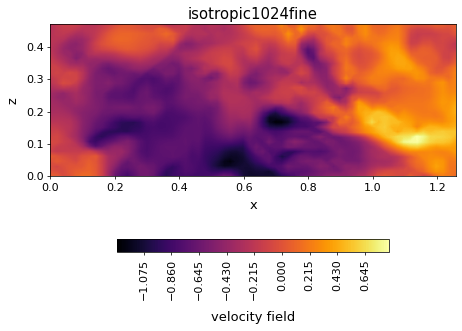

In [ ]:
"""
2D plane demo points : evenly spaced over a 2D plane lying along one of the primary axes
    - time : the time to be queried (snapshot number for datasets without a full time evolution).
    - nx, nz : number of points along each axis. total number of points queried will be n_points = nx * nz.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 2D plane.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
import cv2
import os


nx = 64
nz = 32
n_points = nx * nz
frames = "frames"
os.makedirs(frames, exist_ok=True)

x_points = np.linspace(0.0, 0.4 * np.pi, nx, dtype = np.float64)
y_points = 0.9
z_points = np.linspace(0.0, 0.15 * np.pi, nz, dtype = np.float64)

points = np.zeros((n_points, 3), dtype = np.float64)
for i in range(nx):
    for j in range(nz):
        points[i * nz + j, 0] = x_points[i]
        points[i * nz + j, 1] = y_points
        points[i * nz + j, 2] = z_points[j]

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, time, temporal_method, spatial_method, spatial_operator, points)

"""
display sample results on screen.
"""
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(points)}')
print(f'\npoints = \n-\n{points}')
# the 1st time index of result corresponds to the final time for the "position" variable and the initial time for all other variables.
print(f'\nresult (1st time index) = \n-\n{result[0]}\n')

"""
with result, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 2D plane.
""";
if nx >= 2 and nz >= 2:
    # user-defined plot parameters.
    # which time of the data to plot (0-based index, so the first time component is specified as 0).
    time_component = 0
    # which component (column) of the data to plot (0-based index, so the first component is specified as 0).
    plot_component = 0

    # reformat 'result' for plotting.
    result_time = result[time_component]
    result_array = np.array(result_time)
    data_plot = np.zeros((nx, nz, len(result_time.columns)), dtype = np.float32)
    x_plot = np.zeros((nx, nz), dtype = np.float64)
    z_plot = np.zeros((nx, nz), dtype = np.float64)

    for i in range(nx):
        for j in range(nz):
            x_plot[i, j] = x_points[i]
            z_plot[i, j] = z_points[j]
            data_plot[i, j, :] = result_array[i * nz + j, :]

    # plot the data.
    fig = plt.figure(figsize = (7, 7), dpi = 67)
    contour = plt.contourf(x_plot, z_plot, data_plot[:, :, plot_component], levels = 500, cmap = 'inferno')
    plt.gca().set_aspect('equal')
    # select the colorbar orientation depending on which axis is larger.
    colorbar_orientation = 'vertical' if (np.max(z_plot) - np.min(z_plot)) >= (np.max(x_plot) - np.min(x_plot)) else 'horizontal'
    cbar = plt.colorbar(contour, shrink = 0.67, orientation = colorbar_orientation)
    # rotate the horizontal colorbar labels.
    if colorbar_orientation == 'horizontal':
        for label in cbar.ax.get_xticklabels():
            label.set_rotation(90)
    cbar.set_label(f'{variable} {spatial_operator}', labelpad = 12, fontsize = 14)
    plt.title(f'{dataset_title}', fontsize = 16)
    plt.xlabel('x', labelpad = 7, fontsize = 14)
    plt.ylabel('z', labelpad = 7, fontsize = 14)
    cbar.ax.tick_params(labelsize = 12)
    plt.tick_params(axis = 'both', labelsize = 12)
    plt.tight_layout()
    plt.show()
    plt.close()
    result

## **10월 3주차 과제 수행**

In [ ]:
print(type(result[0]))
result[0].shape
print(result[0])
ux_value = result[0]['ux']
uy_value = result[0]['uy']
uz_value = result[0]['uz']
print(type(ux_value))
print(ux_value.shape)
print(ux_value)
print(uy_value)

<class 'pandas.core.frame.DataFrame'>
            ux        uy        uz
0     0.055171 -0.491358 -0.536409
1    -0.022838 -0.450172 -0.588043
2    -0.051610 -0.477811 -0.671699
3    -0.032007 -0.641775 -0.795818
4     0.036316 -0.730548 -0.997960
...        ...       ...       ...
2043 -0.221557  0.104360 -1.076229
2044 -0.131345  0.046951 -1.002660
2045 -0.015052 -0.012947 -0.922173
2046  0.043395  0.057363 -0.807870
2047  0.070973  0.171665 -0.700601

[2048 rows x 3 columns]
<class 'pandas.core.series.Series'>
(2048,)
0       0.055171
1      -0.022838
2      -0.051610
3      -0.032007
4       0.036316
          ...   
2043   -0.221557
2044   -0.131345
2045   -0.015052
2046    0.043395
2047    0.070973
Name: ux, Length: 2048, dtype: float32
0      -0.491358
1      -0.450172
2      -0.477811
3      -0.641775
4      -0.730548
          ...   
2043    0.104360
2044    0.046951
2045   -0.012947
2046    0.057363
2047    0.171665
Name: uy, Length: 2048, dtype: float32


In [ ]:
ux_n = (ux_value - ux_value.min()) / (ux_value.max() - ux_value.min())
uy_n = (uy_value - uy_value.min()) / (uy_value.max() - uy_value.min())
uz_n = (uz_value - uz_value.min()) / (uz_value.max() - uz_value.min())
print(type(ux_n))
print('ux_n min: ', ux_n.min())
print(ux_n)
print(uy_n)
print(uz_n)
result = pd.concat([ux_n, uy_n, uz_n], axis=1)
result
#######plt.imshow()

<class 'pandas.core.series.Series'>
ux_n min:  0.0
0       0.632945
1       0.595964
2       0.582324
3       0.591617
4       0.624007
          ...   
2043    0.501760
2044    0.544525
2045    0.599655
2046    0.627362
2047    0.640436
Name: ux, Length: 2048, dtype: float32
0       0.678248
1       0.692904
2       0.683069
3       0.624721
4       0.593130
          ...   
2043    0.890238
2044    0.869809
2045    0.848494
2046    0.873514
2047    0.914190
Name: uy, Length: 2048, dtype: float32
0       0.509771
1       0.484299
2       0.443029
3       0.381799
4       0.282078
          ...   
2043    0.243466
2044    0.279760
2045    0.319465
2046    0.375854
2047    0.428771
Name: uz, Length: 2048, dtype: float32


,ux,uy,uz
0,0.632945,0.678248,0.509771
1,0.595964,0.692904,0.484299
2,0.582324,0.683069,0.443029
3,0.591617,0.624721,0.381799
4,0.624007,0.593130,0.282078
...,...,...,...
2043,0.501760,0.890238,0.243466
2044,0.544525,0.869809,0.279760
2045,0.599655,0.848494,0.319465
2046,0.627362,0.873514,0.375854


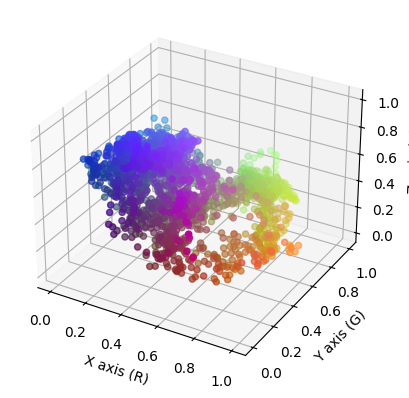

In [ ]:
r = ux_n
g = uy_n
b = uz_n

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.array([r, g, b]).T
ax.scatter(ux_n, uy_n, uz_n, c=colors, marker='o')

ax.set_xlabel('X axis (R)')
ax.set_ylabel('Y axis (G)')
ax.set_zlabel('Z axis (B)')

plt.show()
########contourf, pcolor########

In [ ]:
r = ux_n
g = uy_n
b = uz_n

colors = np.array([r, g, b]).T

fig = go.Figure(data=[go.Scatter3d(
    x=ux_n,
    y=uy_n,
    z=uz_n,
    mode='markers',
    marker=dict(
        size=5,
        color=colors,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X axis (R)',
        yaxis_title='Y axis (G)',
        zaxis_title='Z axis (B)'
    )
)

fig.show()


# **stress graph**

tau_xx: [-1.4431502e-03 -9.8772370e-04 -8.4820342e-05 ...  1.6163457e-03
  7.9572212e-04  5.1017542e-04]
tau_xy: [-7.2157511e-04 -4.9386185e-04 -4.2410171e-05 ...  8.0817286e-04
  3.9786106e-04  2.5508771e-04]
tau_xz: [-7.2157511e-04 -4.9386185e-04 -4.2410171e-05 ...  8.0817286e-04
  3.9786106e-04  2.5508771e-04]
tau_yy: [ 7.6194544e-04  1.2530977e-04 -1.7723273e-03 ...  9.6307078e-05
  1.7076600e-03  2.1146005e-03]
tau_yz: [ 3.8097272e-04  6.2654886e-05 -8.8616367e-04 ...  4.8153539e-05
  8.5383002e-04  1.0573003e-03]
tau_zz: [-0.00095522 -0.00125143 -0.00192192 ...  0.00180181  0.00204954
  0.00198447]


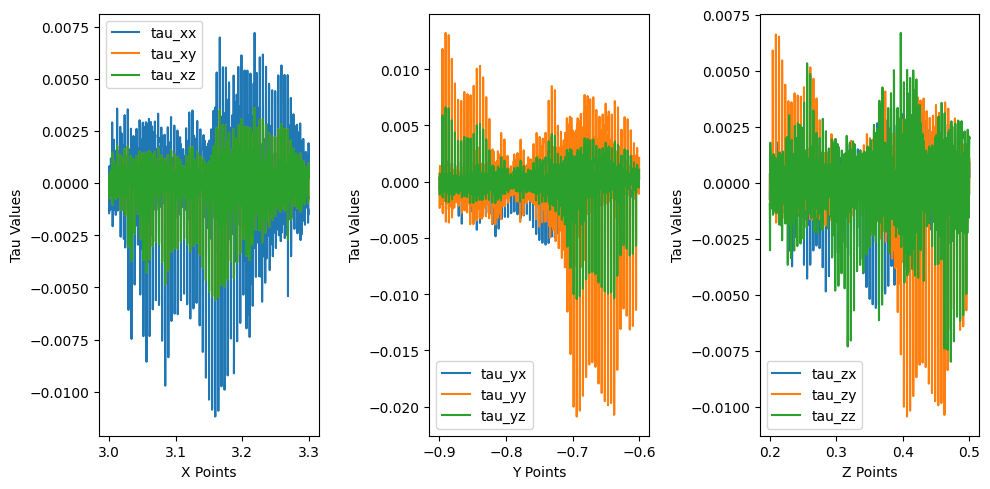

(3, 3, 2048)


array([[[-1.4431502e-03, -9.8772370e-04, -8.4820342e-05, ...,
          1.6163457e-03,  7.9572212e-04,  5.1017542e-04],
        [-7.2157511e-04, -4.9386185e-04, -4.2410171e-05, ...,
          8.0817286e-04,  3.9786106e-04,  2.5508771e-04],
        [-7.2157511e-04, -4.9386185e-04, -4.2410171e-05, ...,
          8.0817286e-04,  3.9786106e-04,  2.5508771e-04]],

       [[-7.2157511e-04, -4.9386185e-04, -4.2410171e-05, ...,
          8.0817286e-04,  3.9786106e-04,  2.5508771e-04],
        [ 7.6194544e-04,  1.2530977e-04, -1.7723273e-03, ...,
          9.6307078e-05,  1.7076600e-03,  2.1146005e-03],
        [ 3.8097272e-04,  6.2654886e-05, -8.8616367e-04, ...,
          4.8153539e-05,  8.5383002e-04,  1.0573003e-03]],

       [[-7.2157511e-04, -4.9386185e-04, -4.2410171e-05, ...,
          8.0817286e-04,  3.9786106e-04,  2.5508771e-04],
        [ 3.8097272e-04,  6.2654886e-05, -8.8616367e-04, ...,
          4.8153539e-05,  8.5383002e-04,  1.0573003e-03],
        [-9.5521711e-04, -1.2514289e

In [ ]:
time = 0

nx = 2048
ny = 2048
nz = 2048
n_points = nx * ny * nz

x_points = np.linspace(3.0, 3.3, nx, dtype = np.float64)
y_points = np.linspace(-0.9, -0.6, ny, dtype = np.float64)
z_points = np.linspace(0.2, 0.5, nz, dtype = np.float64)

v = 0.000185
dx=dy=dz=0.3/2048
import numpy as np


v = 0.000185
dx=dy=dz=0.02

duxdx = np.gradient(ux_value, dx, axis=0)
duxdy = np.gradient(ux_value, dy, axis=0)
duxdz = np.gradient(ux_value, dz, axis=0)

duydx = np.gradient(uy_value, dx, axis=0)
duydy = np.gradient(uy_value, dy, axis=0)
duydz = np.gradient(uy_value, dz, axis=0)

duzdx = np.gradient(uz_value, dx, axis=0)
duzdy = np.gradient(uz_value, dy, axis=0)
duzdz = np.gradient(uz_value, dz, axis=0)


tau_xy = v * duxdy
tau_xz = v * duxdz
tau_yz = v * duydz
tau_xx = 2*v*duxdx
tau_yy = 2*v*duydy
tau_zz = 2*v*duzdz

tau = np.array([
    [tau_xx, tau_xy, tau_xz],
    [tau_xy, tau_yy, tau_yz],
    [tau_xz, tau_yz, tau_zz]
])

print("tau_xx:", tau[0, 0])
print("tau_xy:", tau[0, 1])
print("tau_xz:", tau[0, 2])
print("tau_yy:", tau[1, 1])
print("tau_yz:", tau[1, 2])
print("tau_zz:", tau[2, 2])

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(x_points, tau[0, 0], label="tau_xx")
plt.plot(x_points, tau[0, 1], label="tau_xy")
plt.plot(x_points, tau[0, 2], label="tau_xz")
plt.xlabel('X Points')
plt.ylabel('Tau Values')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(y_points, tau[1, 0], label="tau_yx")
plt.plot(y_points, tau[1, 1], label="tau_yy")
plt.plot(y_points, tau[1, 2], label="tau_yz")
plt.xlabel('Y Points')
plt.ylabel('Tau Values')
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(z_points, tau[2, 0], label="tau_zx")
plt.plot(z_points, tau[2, 1], label="tau_zy")
plt.plot(z_points, tau[2, 2], label="tau_zz")
plt.xlabel('Z Points')
plt.ylabel('Tau Values')
plt.legend()

plt.tight_layout()
plt.show()
print(tau.shape)
tau